<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Non_Vector_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report



In [ ]:
# Открываем файл README (без расширения) для чтения
with open('README', 'r', encoding='utf-8') as file:
    content = file.read()

print(content)


Large Movie Review Dataset v1.0

Overview

This dataset contains movie reviews along with their associated binary
sentiment polarity labels. It is intended to serve as a benchmark for
sentiment classification. This document outlines how the dataset was
gathered, and how to use the files provided. 

Dataset 

The core dataset contains 50,000 reviews split evenly into 25k train
and 25k test sets. The overall distribution of labels is balanced (25k
pos and 25k neg). We also include an additional 50,000 unlabeled
documents for unsupervised learning. 

In the entire collection, no more than 30 reviews are allowed for any
given movie because reviews for the same movie tend to have correlated
ratings. Further, the train and test sets contain a disjoint set of
movies, so no significant performance is obtained by memorizing
movie-unique terms and their associated with observed labels.  In the
labeled train/test sets, a negative review has a score <= 4 out of 10,
and a positive review has a scor

In [ ]:
# функция для чтения отзывов и присвоения им меток:
def load_reviews_from_folder(folder, label):
    reviews = []
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            with open(os.path.join(folder, filename), 'r', encoding='utf-8') as file:
                reviews.append((file.read(), label))
    return reviews


In [ ]:
#загружаем отзывы для тренировочного и тестового наборов данных:
train_pos = load_reviews_from_folder(r'D:\train\pos', 1)
train_neg = load_reviews_from_folder(r'D:\train\neg', 0)
test_pos = load_reviews_from_folder(r'D:\test\pos', 1)
test_neg = load_reviews_from_folder(r'D:\test\neg', 0)


In [ ]:
# объединим загруженные отзывы в один набор данных:
# Тренировочные данные
train_data = train_pos + train_neg

# Тестовые данные
test_data = test_pos + test_neg

# Преобразуем в DataFrame
train_df = pd.DataFrame(train_data, columns=['review', 'sentiment'])
test_df = pd.DataFrame(test_data, columns=['review', 'sentiment'])


In [ ]:
train_df.head()

,review,sentiment
0,Bromwell High is a cartoon comedy. It ran at t...,1
1,Homelessness (or Houselessness as George Carli...,1
2,Brilliant over-acting by Lesley Ann Warren. Be...,1
3,This is easily the most underrated film inn th...,1
4,This is not the typical Mel Brooks film. It wa...,1


In [ ]:
test_df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [ ]:
#преобразуем текстовые данные в числовой формат.
#Примененим Bag of Words (BOW):

vectorizer_bow = CountVectorizer(stop_words='english', max_features=5000)

# Преобразуем тренировочные и тестовые данные
X_train_bow = vectorizer_bow.fit_transform(train_df['review'])
X_test_bow = vectorizer_bow.transform(test_df['review'])


In [ ]:
#Применение TF-IDF:
vectorizer_tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Преобразуем тренировочные и тестовые данные
X_train_tfidf = vectorizer_tfidf.fit_transform(train_df['review'])
X_test_tfidf = vectorizer_tfidf.transform(test_df['review'])


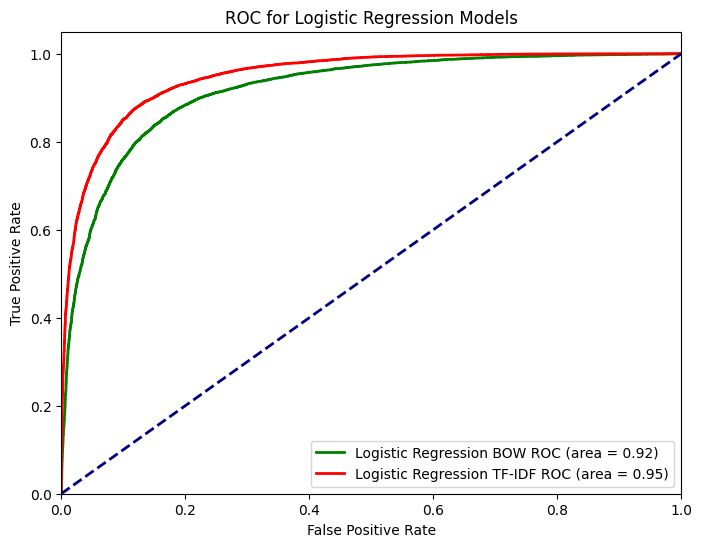

Accuracy (Logistic Regression BOW): 0.84312
              precision    recall  f1-score   support

           0       0.84      0.85      0.84     12500
           1       0.85      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

Accuracy (Logistic Regression TF-IDF): 0.87784
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
import matplotlib.pyplot as plt

# Логистическая регрессия для BOW
model_lr_bow = LogisticRegression(max_iter=1000)
model_lr_bow.fit(X_train_bow, train_df['sentiment'])

# Прогнозы вероятностей для BOW
y_probs_lr_bow = model_lr_bow.predict_proba(X_test_bow)[:, 1]

# Логистическая регрессия для TF-IDF
model_lr_tfidf = LogisticRegression(max_iter=1000)
model_lr_tfidf.fit(X_train_tfidf, train_df['sentiment'])

# Прогнозы вероятностей для TF-IDF
y_probs_lr_tfidf = model_lr_tfidf.predict_proba(X_test_tfidf)[:, 1]

# Построение ROC-кривых и вычисление AUC для BOW и TF-IDF
fpr_lr_bow, tpr_lr_bow, _ = roc_curve(test_df['sentiment'], y_probs_lr_bow)
roc_auc_lr_bow = auc(fpr_lr_bow, tpr_lr_bow)

fpr_lr_tfidf, tpr_lr_tfidf, _ = roc_curve(test_df['sentiment'], y_probs_lr_tfidf)
roc_auc_lr_tfidf = auc(fpr_lr_tfidf, tpr_lr_tfidf)

# Построение графиков ROC-кривых для BOW и TF-IDF
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr_bow, tpr_lr_bow, color='green', lw=2, label=f'Logistic Regression BOW ROC (area = {roc_auc_lr_bow:.2f})')
plt.plot(fpr_lr_tfidf, tpr_lr_tfidf, color='red', lw=2, label=f'Logistic Regression TF-IDF ROC (area = {roc_auc_lr_tfidf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Logistic Regression Models')
plt.legend(loc="lower right")
plt.show()

# Прогнозы для BOW и TF-IDF
y_pred_lr_bow = model_lr_bow.predict(X_test_bow)
y_pred_lr_tfidf = model_lr_tfidf.predict(X_test_tfidf)


print("Accuracy (Logistic Regression BOW):", accuracy_score(test_df['sentiment'], y_pred_lr_bow))
print(classification_report(test_df['sentiment'], y_pred_lr_bow))

print("Accuracy (Logistic Regression TF-IDF):", accuracy_score(test_df['sentiment'], y_pred_lr_tfidf))
print(classification_report(test_df['sentiment'], y_pred_lr_tfidf))


In [ ]:
#Видим, что обе модели показали хорошие результаты, но при использовании TF-IDF векторизации, результаты намного лучше.
#воспользуемся словарем тональности слов

In [ ]:

#Загрузка словаря  тональности слов
word_sentiment = {"the": -0.1, "amazing": 0.9, "bad": -0.8}

# функция взвешивания
def custom_tfidf_weights(doc_term_matrix, feature_names):
    # Применение весов к признакам на основе тональности
    for idx, feature in enumerate(feature_names):
        if feature in word_sentiment:
            doc_term_matrix[:, idx] *= (1 + word_sentiment[feature])  # увеличение веса позитивных/негативных слов
    return doc_term_matrix

# Создание векторайзера с TF-IDF
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(train_df['review'])
X_test_tfidf = vectorizer.transform(test_df['review'])

# Применение выборочного взвешивания
X_train_tfidf = custom_tfidf_weights(X_train_tfidf, vectorizer.get_feature_names_out())
X_test_tfidf = custom_tfidf_weights(X_test_tfidf, vectorizer.get_feature_names_out())

# Обучение модели логистической регрессии
model_lr_tfidf = LogisticRegression(max_iter=1000)
model_lr_tfidf.fit(X_train_tfidf, train_df['sentiment'])

# Оценка модели
y_pred_tfidf = model_lr_tfidf.predict(X_test_tfidf)
print("Accuracy (Logistic Regression TF-IDF):", accuracy_score(test_df['sentiment'], y_pred_tfidf))
print(classification_report(test_df['sentiment'], y_pred_tfidf))


Accuracy (Logistic Regression TF-IDF): 0.87628
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.87      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
#не видим улучшения, поработаем с данными

In [ ]:
# Проверка на наличие пропущенных данных
print(train_df.isnull().sum())
print(test_df.isnull().sum())



review             0
sentiment          0
clean_check        0
clean_check_len    0
dtype: int64
review             0
sentiment          0
clean_check        0
clean_check_len    0
dtype: int64


In [ ]:
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Функция для очистки текста от всех символов, кроме букв и пробелов
def clean_text(text):
    # Удаление всех символов, кроме букв и пробелов
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Приведение к нижнему регистру
    text = text.lower()
    return text

# Функция для удаления стоп-слов
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

# Применяем очистку текста
train_df['clean_check'] = train_df['review'].apply(clean_text)
test_df['clean_check'] = test_df['review'].apply(clean_text)

# Применяем удаление стоп-слов
train_df['clean_check'] = train_df['clean_check'].apply(remove_stopwords)
test_df['clean_check'] = test_df['clean_check'].apply(remove_stopwords)

# Удалим пустые строки
train_df = train_df[train_df['clean_check'].str.strip() != '']
test_df = test_df[test_df['clean_check'].str.strip() != '']

# Проверка минимальной длины строки
train_df['clean_check_len'] = train_df['clean_check'].apply(len)
test_df['clean_check_len'] = test_df['clean_check'].apply(len)

# Удалим строки с длиной менее 3 символов
train_df = train_df[train_df['clean_check_len'] >= 3]
test_df = test_df[test_df['clean_check_len'] >= 3]

# Векторизация TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

# Применяем векторизацию
X_train_tfidf = tfidf_vectorizer.fit_transform(train_df['clean_check'])
X_test_tfidf = tfidf_vectorizer.transform(test_df['clean_check'])



In [ ]:
model_tfidf = LogisticRegression(max_iter=1000)


model_tfidf.fit(X_train_tfidf, train_df['sentiment'])
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

print("Accuracy (Logistic Regression TF-IDF):", model_tfidf.score(X_test_tfidf, test_df['sentiment']))
print(classification_report(test_df['sentiment'], y_pred_tfidf))


Accuracy (Logistic Regression TF-IDF): 0.87684
              precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



In [ ]:
# немного лучше, но все еще не идеально. Воспользуемся дополнительной информацией о  рейтинге фильма, <=4 - отрицательный отзыв
#>=7 - положительный

In [ ]:
# Функция для чтения отзывов, присвоения меток и извлечения рейтинга из названия файла
def load_reviews_with_rating(folder, label):
    reviews = []
    for filename in os.listdir(folder):
        if filename.endswith(".txt"):
            # Извлечение рейтинга из имени файла
            rating = int(filename.split('_')[1].split('.')[0])

            # Чтение файла
            with open(os.path.join(folder, filename), 'r', encoding='utf-8') as file:
                review_text = file.read()
                # Добавляем отзыв, метку и рейтинг
                reviews.append((review_text, label, rating))
    return reviews

# Загружаем отзывы с метками и рейтингом для тренировочного и тестового наборов
train_pos_r = load_reviews_with_rating(r'D:\train\pos', 1)
train_neg_r = load_reviews_with_rating(r'D:\train\neg', 0)
test_pos_r = load_reviews_with_rating(r'D:\test\pos', 1)
test_neg_r = load_reviews_with_rating(r'D:\test\neg', 0)

# Объединяем отзывы в один набор данных
# Тренировочные данные
train_data_r = train_pos_r + train_neg_r

# Тестовые данные
test_data_r = test_pos_r + test_neg_r

# Преобразуем в DataFrame
train_df_r = pd.DataFrame(train_data_r, columns=['review', 'sentiment', 'rating'])
test_df_r = pd.DataFrame(test_data_r, columns=['review', 'sentiment', 'rating'])

# Проверка данных
print(train_df_r.head())
print(test_df_r.head())

                                              review  sentiment  rating
0  Bromwell High is a cartoon comedy. It ran at t...          1       9
1  Homelessness (or Houselessness as George Carli...          1       8
2  Brilliant over-acting by Lesley Ann Warren. Be...          1      10
3  This is easily the most underrated film inn th...          1       7
4  This is not the typical Mel Brooks film. It wa...          1       8
                                              review  sentiment  rating
0  I went and saw this movie last night after bei...          1      10
1  Actor turned director Bill Paxton follows up h...          1       7
2  As a recreational golfer with some knowledge o...          1       9
3  I saw this film in a sneak preview, and it is ...          1       8
4  Bill Paxton has taken the true story of the 19...          1       8


In [ ]:
# Проверка на наличие пропущенных данных
print(train_df_r.isnull().sum())
print(test_df_r.isnull().sum())

review       0
sentiment    0
rating       0
dtype: int64
review       0
sentiment    0
rating       0
dtype: int64


In [ ]:
# отфильтруем нейтральные отзывы с рейтингом между 5 и 6, если они есть
train_df_r = train_df_r[(train_df_r['rating'] <= 4) | (train_df_r['rating'] >= 7)]
test_df_r = test_df_r[(test_df_r['rating'] <= 4) | (test_df_r['rating'] >= 7)]

In [ ]:
# Применяем очистку текста
train_df_r['clean_check'] = train_df_r['review'].apply(clean_text)
test_df_r['clean_check'] = test_df_r['review'].apply(clean_text)

# Применяем удаление стоп-слов
train_df_r['clean_check'] = train_df_r['clean_check'].apply(remove_stopwords)
test_df_r['clean_check'] = test_df_r['clean_check'].apply(remove_stopwords)

# Удалим пустые строки
train_df_r = train_df_r[train_df_r['clean_check'].str.strip() != '']
test_df_r = test_df_r[test_df_r['clean_check'].str.strip() != '']

# Проверка минимальной длины строки
train_df_r['clean_check_len'] = train_df_r['clean_check'].apply(len)
test_df_r['clean_check_len'] = test_df_r['clean_check'].apply(len)

# Удалим строки с длиной менее 3 символов
train_df_r = train_df_r[train_df_r['clean_check_len'] >= 3]
test_df_r = test_df_r[test_df_r['clean_check_len'] >= 3]

In [ ]:
from scipy.sparse import hstack

# Векторизация текста с помощью TF-IDF
tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(train_df_r['clean_check'])
X_test_tfidf = tfidf_vectorizer.transform(test_df_r['clean_check'])

# Преобразуем столбец с рейтингом в двумерный массив
train_ratings = train_df_r['rating'].values.reshape(-1, 1)
test_ratings = test_df_r['rating'].values.reshape(-1, 1)

# Объединяем текстовые признаки и числовой признак рейтинга
X_train_combined = hstack([X_train_tfidf, train_ratings])
X_test_combined = hstack([X_test_tfidf, test_ratings])

# Обучение модели логистической регрессии на + новых признаках
model_tfidf = LogisticRegression(max_iter=1000)
model_tfidf.fit(X_train_combined, train_df_r['sentiment'])

# Предсказания
y_pred_tfidf = model_tfidf.predict(X_test_combined)

# Оценка модели
print("Accuracy (Logistic Regression with Rating):", model_tfidf.score(X_test_combined, test_df_r['sentiment']))
print(classification_report(test_df['sentiment'], y_pred_tfidf))


Accuracy (Logistic Regression with Rating): 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12500
           1       1.00      1.00      1.00     12500

    accuracy                           1.00     25000
   macro avg       1.00      1.00      1.00     25000
weighted avg       1.00      1.00      1.00     25000



In [ ]:
#Теперь идеальные результаты:), построим ROC-AUC кривые

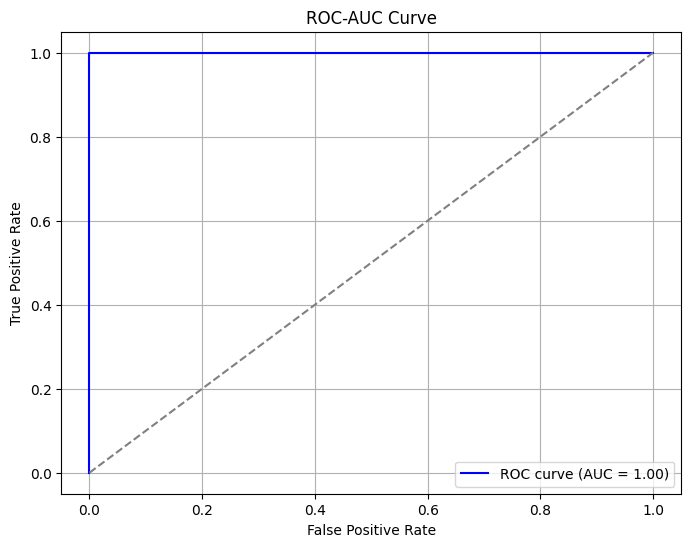

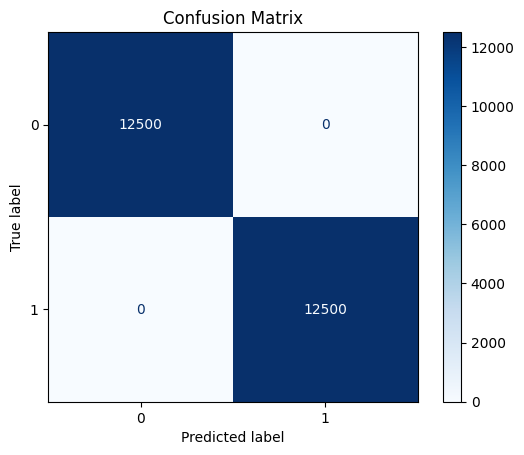

In [ ]:
from sklearn.metrics import  roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

# Предсказание вероятностей для построения ROC-кривой
y_prob_tfidf = model_tfidf.predict_proba(X_test_combined)[:, 1]

# ROC-AUC кривая
fpr, tpr, thresholds = roc_curve(test_df['sentiment'], y_prob_tfidf)
roc_auc = roc_auc_score(test_df['sentiment'], y_prob_tfidf)

# Построение ROC-AUC кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# Матрица ошибок
conf_matrix = confusion_matrix(test_df['sentiment'], y_pred_tfidf)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model_tfidf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()